In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
heart_data=pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
x=heart_data.drop(columns='target', axis=1)
y=heart_data['target']
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 421, 0: 399})

In [10]:
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


In [11]:
model1=LogisticRegression(max_iter=704, random_state=42)
model1.fit(x_train, y_train)
lr_prediction= model1.predict(x_test)
lr_acc_score=accuracy_score(y_test, lr_prediction)
print("Accuracy of Logisctic Regression:", lr_acc_score*100,"\n")


Accuracy of Logisctic Regression: 81.46341463414633 



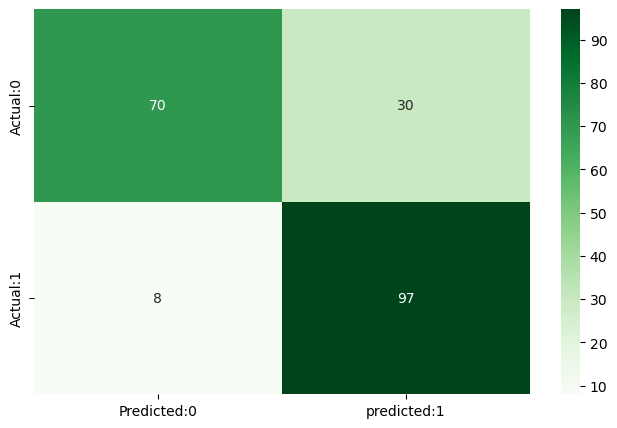



The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



In [12]:
cm=confusion_matrix(y_test, lr_prediction)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print("\n")


print('The details for confusion matrix is =')
print (classification_report(y_test, lr_prediction))

In [13]:
model2=RandomForestClassifier(n_estimators=20, random_state=42, max_depth=5)
model2.fit(x_train, y_train)
rf_prediction=model2.predict(x_test)
rf_acc_score=accuracy_score(y_test, rf_prediction)
print("Accuracy Score of Random Forest Classifier Model:",rf_acc_score*100,"\n")


Accuracy Score of Random Forest Classifier Model: 89.26829268292683 



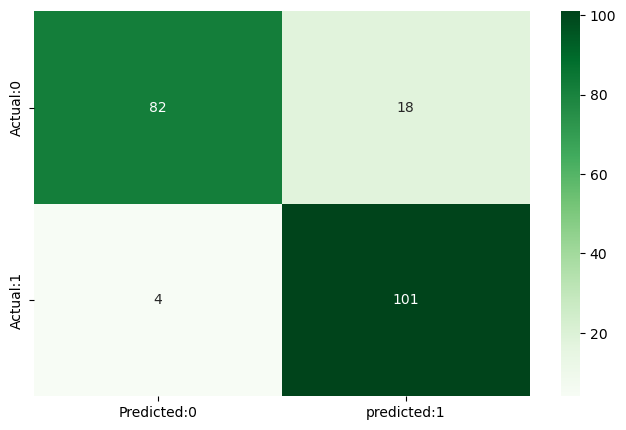



The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       100
           1       0.85      0.96      0.90       105

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205



In [14]:
cm=confusion_matrix(y_test, rf_prediction)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print("\n")


print('The details for confusion matrix is =')
print (classification_report(y_test, rf_prediction))

In [15]:
model3= DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=6)
model3.fit(x_train, y_train)
dt_prediction=model3.predict(x_test)
dt_acc_score=accuracy_score(y_test, dt_prediction)
print("Accuracy Score of DecisionTreeClassifier:",dt_acc_score*100,"\n")


Accuracy Score of DecisionTreeClassifier: 92.19512195121952 



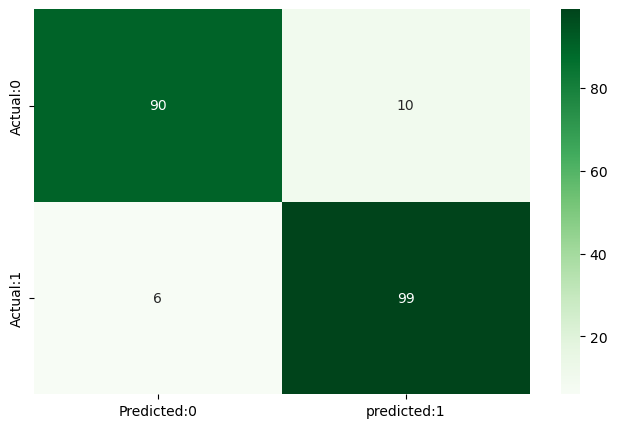



The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       100
           1       0.91      0.94      0.93       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [16]:
cm=confusion_matrix(y_test, dt_prediction)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print("\n")


print('The details for confusion matrix is =')
print (classification_report(y_test, dt_prediction))

In [17]:
model4=SVC(kernel='rbf', C=2, probability=True)
model4.fit(x_train, y_train)
svc_prediction=model4.predict(x_test)
svc_acc_score=accuracy_score(y_test, svc_prediction)
print("Accuracy Score of Support Vector Classifier:",svc_acc_score*100, "\n")

Accuracy Score of Support Vector Classifier: 72.6829268292683 



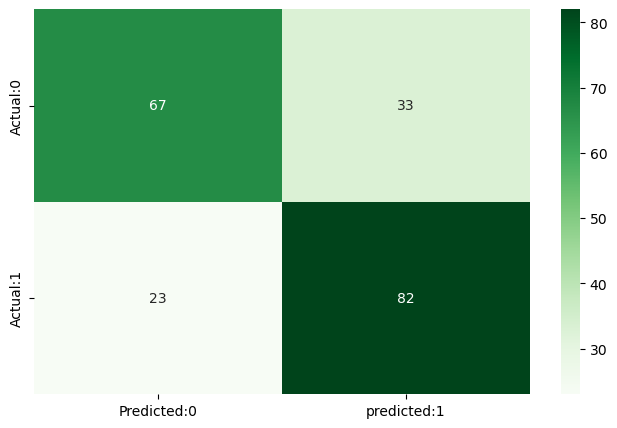



The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.74      0.67      0.71       100
           1       0.71      0.78      0.75       105

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [18]:
cm=confusion_matrix(y_test, svc_prediction)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print("\n")


print('The details for confusion matrix is =')
print (classification_report(y_test, svc_prediction))

In [19]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors_values = range(1, 21)
accuracy_scores = []
for n_neighbors in n_neighbors_values:
    model5 = KNeighborsClassifier(n_neighbors=n_neighbors)
    model5.fit(x_train, y_train)
    knn_prediction = model5.predict(x_test)
    knn_acc_score = accuracy_score(y_test, knn_prediction)
    accuracy_scores.append(knn_acc_score)

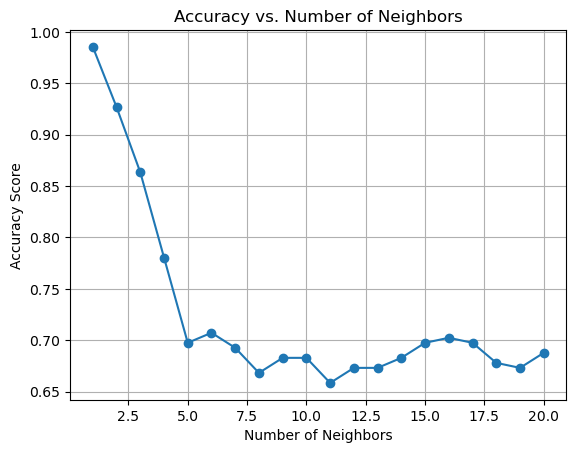

Accuracy Score when n_neighbors=10: 68.29268292682927


In [20]:
# Plotting the graph
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

accuracy_when_n_neighbors_10 = accuracy_scores[9]
print("Accuracy Score when n_neighbors=10:", accuracy_when_n_neighbors_10 * 100)

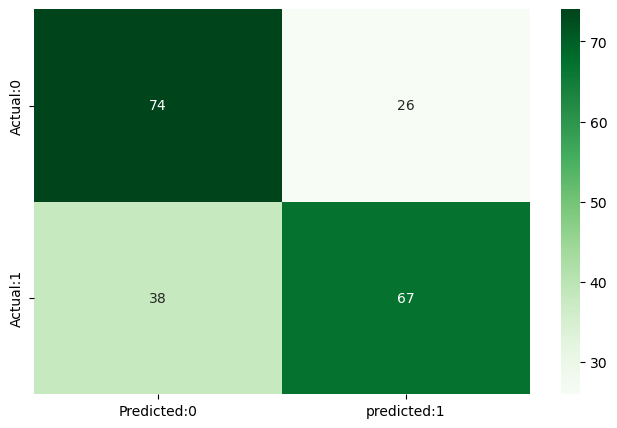



The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       100
           1       0.72      0.64      0.68       105

    accuracy                           0.69       205
   macro avg       0.69      0.69      0.69       205
weighted avg       0.69      0.69      0.69       205



In [21]:
cm=confusion_matrix(y_test, knn_prediction)
conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0', 'predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print("\n")


print('The details for confusion matrix is =')
print (classification_report(y_test, knn_prediction))

In [22]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                                   'Decision Tree','Support Vector Machine','K-Nearest Neighbour',
                                   ], 
                         'Accuracy': [lr_acc_score*100,rf_acc_score*100,
                                      dt_acc_score*100,svc_acc_score*100,knn_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,81.463415
1,Random Forest,89.268293
2,Decision Tree,92.195122
3,Support Vector Machine,72.682927
4,K-Nearest Neighbour,68.780488


In [23]:
def output_label(n):
    if n==0:
        return "Does Not Have a Heart Disease!"
    elif n==1:
        return "Have a Heart Disease!"

In [24]:
def manual_testing(input_data):
    input_data_as_numpy_array=np.asarray(input_data)
    input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
    pred_LR = model1.predict(input_data_reshaped)
    pred_RF = model2.predict(input_data_reshaped)
    pred_DT = model3.predict(input_data_reshaped)
    pred_SVC = model4.predict(input_data_reshaped)
    pred_KNN = model5.predict(input_data_reshaped)
    return print(f"""\nLR Prediction: {output_label(pred_LR[0])}
                    \nRF Prediction: {output_label(pred_RF[0])} 
                    \nDT Prediction: {output_label(pred_DT[0])} 
                    \nSVC Prediction: {output_label(pred_SVC[0])} 
                    \nKNN Prediction: {output_label(pred_KNN[0])}""")

In [25]:
input_data=(54,1,0,122,286,0,0,116,1,3.2,1,2,2)
manual_testing(input_data)


LR Prediction: Does Not Have a Heart Disease!
                    
RF Prediction: Does Not Have a Heart Disease! 
                    
DT Prediction: Does Not Have a Heart Disease! 
                    
SVC Prediction: Does Not Have a Heart Disease! 
                    
KNN Prediction: Does Not Have a Heart Disease!


C:\Users\DHRUV GUPTA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\DHRUV GUPTA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\DHRUV GUPTA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\DHRUV GUPTA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\DHRUV GUPTA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
